In [14]:
import pandas as pd
wine = pd.read_csv('wine_data.csv',names=["Cultivator",
                                          "Alchol",
                                          "Malic_Acid",
                                          "Ash",
                                          "Alcalinity_of_Ash",
                                          "Magnesium",
                                          "Total_phenols",
                                          "Falvanoids",
                                          "Noflavanoid_phenols",
                                          "Proanthocyanins",
                                          "Color_intensity",
                                          "Hue",
                                          "OD280",
                                          "Proline"])

wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cultivator,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alchol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic_Acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity_of_Ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Falvanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Noflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [15]:
wine.shape

(178, 14)

In [16]:
#variavel depenente y

X = wine.drop('Cultivator',axis=1)#dados referentes a todo objeto menos a primeira linha
y= wine['Cultivator']#dados referentes a primeira coluna



In [17]:
# separando os dados para o teste 

from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X,y)

X_train.shape

(133, 13)

In [18]:
#padronizar os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
#treinamento

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(verbose=True,activation='tanh',hidden_layer_sizes=(5,5,5))


In [20]:
mlp.fit(X_train,y_train)

Iteration 1, loss = 1.47265110
Iteration 2, loss = 1.46566017
Iteration 3, loss = 1.45874228
Iteration 4, loss = 1.45189484
Iteration 5, loss = 1.44511842
Iteration 6, loss = 1.43841374
Iteration 7, loss = 1.43178112
Iteration 8, loss = 1.42522060
Iteration 9, loss = 1.41873219
Iteration 10, loss = 1.41231597
Iteration 11, loss = 1.40597206
Iteration 12, loss = 1.39970063
Iteration 13, loss = 1.39350184
Iteration 14, loss = 1.38737586
Iteration 15, loss = 1.38132278
Iteration 16, loss = 1.37534260
Iteration 17, loss = 1.36943521
Iteration 18, loss = 1.36360035
Iteration 19, loss = 1.35783760
Iteration 20, loss = 1.35214640
Iteration 21, loss = 1.34652601
Iteration 22, loss = 1.34097552
Iteration 23, loss = 1.33549388
Iteration 24, loss = 1.33007989
Iteration 25, loss = 1.32473220
Iteration 26, loss = 1.31944938
Iteration 27, loss = 1.31422990
Iteration 28, loss = 1.30907220
Iteration 29, loss = 1.30397468
Iteration 30, loss = 1.29893572
Iteration 31, loss = 1.29395373
Iteration 32, los

C:\Users\Jeferson\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)

In [21]:
predictions = mlp.predict(X_test)
predictions

array([3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1,
       2, 2, 2, 3, 3, 1, 2, 2, 2, 1, 2, 3, 1, 3, 1, 2, 1, 1, 1, 2, 2, 1,
       2], dtype=int64)

In [22]:
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix(y_test, predictions)

array([[14,  0,  0],
       [ 1, 20,  0],
       [ 0,  3,  7]], dtype=int64)

In [23]:
acuracia = accuracy_score(y_test,predictions)
acuracia*100

91.11111111111111

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       0.87      0.95      0.91        21
           3       1.00      0.70      0.82        10

    accuracy                           0.91        45
   macro avg       0.93      0.88      0.90        45
weighted avg       0.92      0.91      0.91        45



In [25]:
mlp.coefs_

[array([[-0.03194504, -0.37390719, -0.21830331,  0.20179857,  0.08236677],
        [ 0.04074836,  0.1296563 , -0.09161576,  0.17004413,  0.62919286],
        [-0.50726655,  0.12454928,  0.22990546, -0.33385362,  0.01258322],
        [ 0.72208264, -0.27922206, -0.29603277, -0.0960868 , -0.53852793],
        [-0.25662064, -0.12901697,  0.19486349,  0.20862102, -0.2306044 ],
        [-0.14597844,  0.34007949, -0.48284514,  0.0855718 , -0.08698457],
        [-0.11850882, -0.01837301, -0.66886195,  0.16740353,  0.00416354],
        [-0.03183347, -0.30907427, -0.05458836, -0.47446043, -0.14127678],
        [-0.23927434,  0.28325092,  0.37513791,  0.60134994,  0.4139452 ],
        [-0.71670318,  0.2865552 , -0.22003903, -0.29117903,  0.16932593],
        [-0.04388337, -0.06497069, -0.43683339,  0.40325491, -0.04047584],
        [-0.36425455,  0.09573087, -0.12037716,  0.36443363,  0.21613014],
        [-0.07917983,  0.34715057,  0.1621748 ,  0.60357804,  0.60899892]]),
 array([[ 0.72058903,  

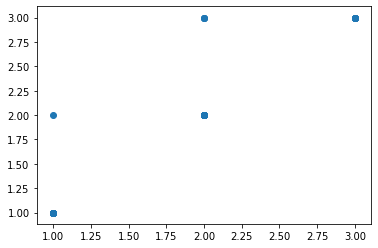

In [26]:
import matplotlib.pyplot as plt

plt.scatter(x=predictions, y=y_test)
plt.show()